In [1]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression
!unzip salary-dataset-simple-linear-regression.zip


Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 962kB/s]
Archive:  salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [2]:
import pandas as pd

data = pd.read_csv('Salary_dataset.csv', header=0)

In [3]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [32]:
x = data.iloc[:,1].values
y = data.iloc[:2].values

In [33]:
import torch

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1,1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [34]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    y = self.linear(x)
    return y

model = LinearRegressionModel()

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
x_tensor = x_tensor.to(device)
y_tensor = y_tensor.to(device)


In [36]:
import torch.optim as optim

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [37]:
num_epochs = 100
loss_list= []

In [38]:
x_tensor

tensor([[ 1.2000],
        [ 1.4000],
        [ 1.6000],
        [ 2.1000],
        [ 2.3000],
        [ 3.0000],
        [ 3.1000],
        [ 3.3000],
        [ 3.3000],
        [ 3.8000],
        [ 4.0000],
        [ 4.1000],
        [ 4.1000],
        [ 4.2000],
        [ 4.6000],
        [ 5.0000],
        [ 5.2000],
        [ 5.4000],
        [ 6.0000],
        [ 6.1000],
        [ 6.9000],
        [ 7.2000],
        [ 8.0000],
        [ 8.3000],
        [ 8.8000],
        [ 9.1000],
        [ 9.6000],
        [ 9.7000],
        [10.4000],
        [10.6000]], device='cuda:0')

In [39]:
for epoch in range(num_epochs):
  y = model(x_tensor)
  loss = loss_function(y, y_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  loss_list.append(loss.item())

  if (epoch+1) % 10 == 0:
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

    for name, param in model.named_parameters():
      print(f'{name}: {param.data}')

Epoch: 10, Loss: 1681347968.0000
linear.weight: tensor([[6976.4067]], device='cuda:0')
linear.bias: tensor([1119.5685], device='cuda:0')
Epoch: 20, Loss: 458847072.0000
linear.weight: tensor([[10141.5029]], device='cuda:0')
linear.bias: tensor([1679.9564], device='cuda:0')
Epoch: 30, Loss: 205284976.0000
linear.weight: tensor([[11573.5078]], device='cuda:0')
linear.bias: tensor([1985.5898], device='cuda:0')
Epoch: 40, Loss: 152139040.0000
linear.weight: tensor([[12217.3477]], device='cuda:0')
linear.bias: tensor([2175.1548], device='cuda:0')
Epoch: 50, Loss: 140451616.0000
linear.weight: tensor([[12502.7695]], device='cuda:0')
linear.bias: tensor([2311.7261], device='cuda:0')
Epoch: 60, Loss: 137344992.0000
linear.weight: tensor([[12625.2148]], device='cuda:0')
linear.bias: tensor([2423.9895], device='cuda:0')
Epoch: 70, Loss: 136018800.0000
linear.weight: tensor([[12673.5713]], device='cuda:0')
linear.bias: tensor([2524.9922], device='cuda:0')
Epoch: 80, Loss: 135066448.0000
linear.we

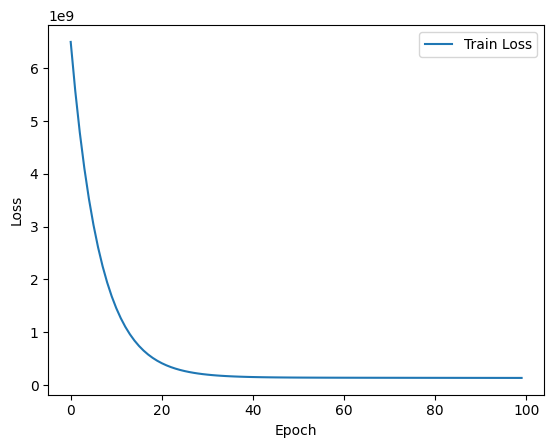

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1,1))

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

print(x_scaled)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.